In [2]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.transform import radon
from skimage.data import binary_blobs
from skimage.draw import disk

The radon transform is available in Python as `radon` in the `skimage.transform` library. To study the ill-posedness of the inverse problem, we first build an explicit matrix representation of the radon transform in `getK`.

1. Construct the matrix for `nx = 32` and plot the left and right singular vectors and singular values.
2. Generate noisy data and apply the regularised pseudo-inverse, selecting an appropriate regularisation parameter for various noise levels
3. Explain how regularisation reduces noise and limits the resolution of the resulting image
4. Can you think of a type of noise for which the usual regularisation does not work?

In [10]:
def getK(nx):
    """
    Get explicit matrix representation of the Radon transform for an nx by nx image.
    
    input:
        nx - dimension of the input image
        theta - array with angles (in degrees)
        
    output:
        K - matrix of size nd*nt by nx*nx, with nd = int(np.sqrt(2)*nx)+1
    """
    theta = np.linspace(0,180,nx)
    nd = int(np.sqrt(2)*nx)+1
    N = nx**2
    M = nd*nx
    K = np.zeros((M,N))
    for i in range(nx**2):
        ei = np.zeros(nx**2)
        ei[i] = 1
        K[:,i] = radon(np.reshape(ei,(nx,nx)), theta=theta, circle = False).ravel()
    return K

def getPhantom(nx, r = 0.9):
    """
    Define phantom image.
    
    input:
        nx - dimension of the input image
        r - radius of phantom, optional (default = 0.9)
    
    output:
        u - phantom image as 1d array of length nx*nx
    """
    # mask
    mask = np.zeros((nx,nx))
    ii,jj = disk((nx//2,nx//2),r * (nx//2))
    mask[ii,jj] = 1
    
    # binary blobs
    u = 0.5 * np.float64(binary_blobs(length=nx, blob_size_fraction=0.5))
    u += 0.5 * np.float64(binary_blobs(length=nx, blob_size_fraction=0.2))
    u *= mask
    
    # return
    return u.ravel()
    
def plot_image(u,nx):
    """
    plot image
    """
    plt.imshow(u.reshape((nx,nx)))

def plot_sinogram(f,nx):
    """
    plot sinogram
    """
    nd = len(f) // nx
    plt.imshow(f.reshape((nd,nx)))

In [11]:
# settings
nx = 32

# get matrix
K = getK(nx)

# get phantom
u = getPhantom(nx)

# generate data
f = K@u

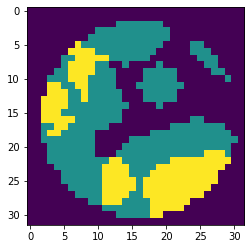

In [12]:
plot_image(u,nx)

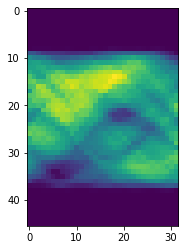

In [13]:
plot_sinogram(f,nt)